In [52]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## 1. Generate dataset y = 7x

In [53]:
x = torch.randn(100,1)
y = 7*x + torch.randn(100,1)

Text(0.5, 1.0, 'Scatter plot')

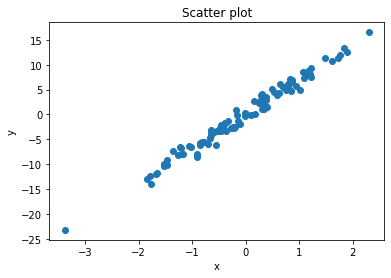

In [54]:
plt.plot(x,y,'o')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Scatter plot')

## 2. Hyper parameters

In [55]:
input_size = 1
output_size = 1
learning_rate = 0.01
num_epochs = 1000

## 3. Model, Loss function and Optimiser

In [56]:
# create a linear regression class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [57]:
# create a funtion to get parameters and plot

def get_params(Model):
    [w, b] = Model.parameters()
    return (w[0][0].item(), b[0].item())


def plot_linear(Model, x):
    w1, b1 = get_params(Model)
    x1 = np.array([x.min(), x.max()])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(x, y)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.title('Fitted line against dataset')
    plt.show()

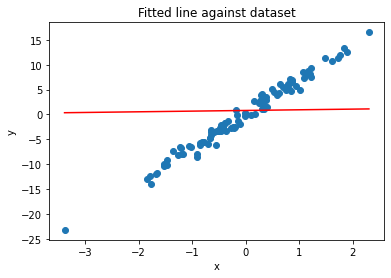

In [58]:
# let test all the function

# create LinearRegression(1,1)
model = LinearRegression(1,1)

# plot it against dataset
plot_linear(model, x)

In [59]:
# define the optimiser anf loss function

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

## 4. Training

In [60]:
losses = []

for i in range(1, num_epochs):   
    # Forward pass
    y_pred = model.forward(x)
    loss = criterion(y_pred, y)
    
    # print loss
    if i % (num_epochs/10) == 0:
        print('Epoch [{}/{}], loss {:.4f}'.format(i, num_epochs, loss.item()))
    
    # Backward and optimise
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch [100/1000], loss 1.7091
Epoch [200/1000], loss 0.9363
Epoch [300/1000], loss 0.9231
Epoch [400/1000], loss 0.9229
Epoch [500/1000], loss 0.9229
Epoch [600/1000], loss 0.9229
Epoch [700/1000], loss 0.9229
Epoch [800/1000], loss 0.9229
Epoch [900/1000], loss 0.9229


## Model equation and plot

In [61]:
w1,b1 = get_params(model)

print('The equation of the model is y = {:.4f}x {:.4f}'.format(w1, b1))

The equation of the model is y = 6.9327x 0.1596


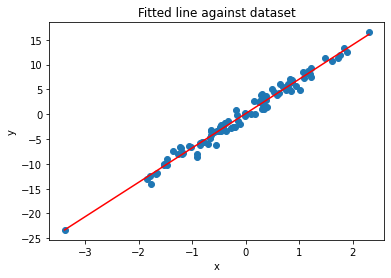

In [62]:
plot_linear(model, x)

### Thanks for reading! Have a nice day